# Criando o banco de dados escolhido
<p>Banco escolhido <b>Mysql</b></p>
<p> Para isso usaremos a biblioteca <b>mysql.connector</b> outras bibliotecas poderiam ser usados, como <b>pymssql</b> <b>sqlite3</b>  <b>sqlalchemy</b> e outras. </p>

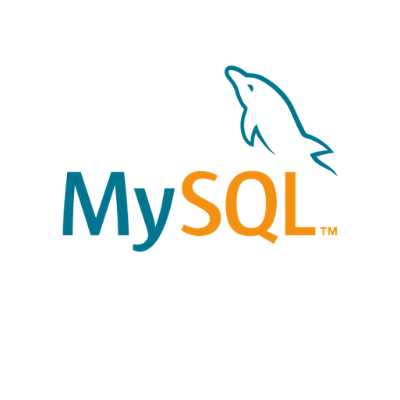

In [1]:
import mysql.connector

In [2]:
my_db = mysql.connector.connect(host='localhost',   # Servidor 
                        user="root",                # Usuario
                        password="123456")          # Senha

<p>Criamos um cursor que será responsável por executar nossas querys SQL </p>

In [3]:
querys = my_db.cursor()

<p> Além disso utilizamos o metódo <b>.execute()</b> para executar as querys </p>

# Querys DDL

1. CREATE  
2. ALTER 
3. DROP 

## Create
<p> Podemos utilizar o create de diversas maneiras, <b>create database</b>, <b>create table</b>, <b>create sequence</b>, <b>create index</b>.

### Create Database

In [8]:
querys.execute('CREATE DATABASE bancoresumao')   # Usando create para criar um banco de dados

In [9]:
querys.execute('SHOW DATABASES')

In [10]:
for item in querys:              # Verificando se o banco foi criado
    print(item)

('bancoresumao',)
('covid_brasil',)
('covid_database_brasil',)
('information_schema',)
('mysql',)
('performance_schema',)
('sakila',)
('sys',)
('world',)


In [11]:
# Conectando ao banco criado
my_db = mysql.connector.connect(
  host="localhost",
  user="root",
  password="123456",
  database="bancoresumao"
)

querys = my_db.cursor()

### Create Table

<p> A criar nossa tabela devemos ficar atento a 3 coisas </p>

* Tipos de dados: <b>Varchar</b>, <b>Int</b>, <b>Date</b> etc
* Parametros de dados: <b>Varchar(numero de caracteres))</b>
* Auxiliares que nos ajuda-nos a lidar com armazenamento ex: <b>AUTO_INCREMENT</b>


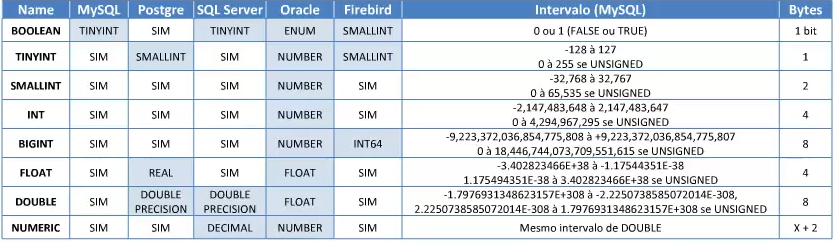

* Auxiliares:
    * NULL / NOT NULL (permite ou remove permissão para valores nulos)
    * Unsigned / Signed (permite ou não numeros negativos)
    * Auto_increment (implementa um contador como valor da determinada coluna)
    * Zerofill (completa o valor numerico com zeros a esquerda)

In [13]:
table = """

CREATE TABLE resumo (
    id int AUTO_INCREMENT,
    nome varchar(40),
    idade int,
    sexo char(1),
    aniversario date,
    PRIMARY KEY(id)
)

"""
querys.execute(table)

### Insert 
* Para inserir dados devemos ficar atentos aos usar o comando **INTO** e o comando **VALUES**
* Podemos inserir dados de duas maneiras, com **execute** e **executemany**

#### Inserando dados com Execute
* Com a função execute, faremos uma execução por vez, utilizando um for para substituir os valores na str de query

In [14]:
from datetime import date
nome = ['Andre','Joao','Carlos','Miguel','Camila']
idade = [20,30,22,19,40]
sexo = ['M','M','M','M','M']
niver = [date((2022-20),12,20),date((2022-30),2,2),date((2022-22),3,24),date((2022-19),5,10),date((2022-40),12,25)]

In [23]:
dados = """
INSERT INTO resumo (nome, idade, sexo, aniversario) values ('{}','{}','{}','{}')

"""

In [25]:
for value in range(5):
    querys.execute(dados.format(nome[value],idade[value],sexo[value],niver[value]))

#### Inserindo dados com executemany
* Com executemany iremos fornecer uma lista de tuplas e atribuiremos %s ao local de substituição do dado na função **executemany**

In [34]:
lista_tuplas = [('Maria',24,'F',date((2022-24),11,5)),('Janete',22,'F',date((2022-22),4,5))]

In [35]:
sql = """
INSERT INTO resumo (nome, idade, sexo, aniversario) values (%s,%s,%s,%s)

"""

In [36]:
querys.executemany(sql,lista_tuplas)

# Salvando os dados com COMMIT

In [40]:
my_db.commit()

### Select Data

In [37]:
select = """
SELECT * FROM resumo
"""

In [42]:
querys.execute(select)

In [43]:
querys.fetchall()

[(1, 'Andre', 20, 'M', datetime.date(2002, 12, 20)),
 (2, 'Joao', 30, 'M', datetime.date(1992, 2, 2)),
 (3, 'Carlos', 22, 'M', datetime.date(2000, 3, 24)),
 (4, 'Miguel', 19, 'M', datetime.date(2003, 5, 10)),
 (5, 'Camila', 40, 'M', datetime.date(1982, 12, 25)),
 (6, 'Maria', 24, 'F', datetime.date(1998, 11, 5)),
 (7, 'Janete', 22, 'F', datetime.date(2000, 4, 5))]

# Outros
<p>BACKUP DATABASE testDB
TO DISK = 'D:\backups\testDB.bak'; </p>